# Imports libraries and datasets

In [317]:
# Data processing
import pandas as pd
import numpy as np
import scipy.stats
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_recommenders as tfrs


# Visualization
import seaborn as sb

# Similarity
from sklearn.metrics.pairwise import cosine_similarity

# Other
import math
import random
import sklearn
from nltk.corpus import stopwords
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

In [318]:
ratings = pd.read_csv("../archive/rating_complete.csv")
ratings

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9
...,...,...,...
57633273,353404,502,8
57633274,353404,987,4
57633275,353404,225,8
57633276,353404,243,7


In [319]:
anime_df = pd.read_csv("../archive/anime.csv")
anime_df["anime_id"] = anime_df["MAL_ID"]
anime_df

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,anime_id
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,5
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,6
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,7
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,...,Unknown,Unknown,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,48481
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,48483
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",Summer 2021,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,48488
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,48491


In [320]:
df = pd.merge(ratings, anime_df[['anime_id','Name', 'Genres']], on="anime_id", how="inner")
df

,user_id,anime_id,rating,Name,Genres
0,0,430,9,Fullmetal Alchemist: The Conqueror of Shamballa,"Military, Comedy, Historical, Drama, Fantasy, ..."
1,6,430,8,Fullmetal Alchemist: The Conqueror of Shamballa,"Military, Comedy, Historical, Drama, Fantasy, ..."
2,18,430,10,Fullmetal Alchemist: The Conqueror of Shamballa,"Military, Comedy, Historical, Drama, Fantasy, ..."
3,19,430,8,Fullmetal Alchemist: The Conqueror of Shamballa,"Military, Comedy, Historical, Drama, Fantasy, ..."
4,33,430,4,Fullmetal Alchemist: The Conqueror of Shamballa,"Military, Comedy, Historical, Drama, Fantasy, ..."
...,...,...,...,...,...
57633273,315549,38853,1,Ex-Arm,"Action, Sci-Fi, Ecchi, Seinen"
57633274,350024,38853,10,Ex-Arm,"Action, Sci-Fi, Ecchi, Seinen"
57633275,311855,39435,6,Oshiri Tantei Movie 1: Curry Naru Jiken,"Mystery, Comedy, Kids, Fantasy"
57633276,334473,35746,4,6 Lovers,"Comedy, Drama, Romance, School, Shounen Ai, Sl..."


# Data Preparation
* 57,633,278 rows are to many entries to compute, let's reduce the dataset

In [321]:
# User ratings
print(df["user_id"].value_counts().mean())
df["user_id"].value_counts()

185.87842313882197


189037    15455
162615    14864
68042     13462
283786    12778
259790     9996
          ...  
136422        1
213994        1
196985        1
190834        1
206653        1
Name: user_id, Length: 310059, dtype: int64

In [322]:
# Anime ratings
print(df["anime_id"].value_counts().mean())
df["anime_id"].value_counts()

3415.912636320531


1535     182375
16498    169794
11757    161192
6547     141127
30276    138924
          ...  
39686         1
39685         1
35153         1
40594         1
39627         1
Name: anime_id, Length: 16872, dtype: int64

## Sampling Original dataframe

In [323]:
# We are left still with 38,616,425 entries even after filtering out users and animes
# so let's sample the remaining dataset so we get a smaller one

df_sample = df.sample(frac=0.05)
df_sample # 34622 entries seems more logical for first runs so we can re-run faster

,user_id,anime_id,rating,Name,Genres
25443185,204553,857,7,Air Gear,"Action, Comedy, Ecchi, Shounen, Sports"
47511671,249513,34541,5,Mary to Majo no Hana,"Adventure, Fantasy, Magic"
39653820,299154,36563,9,Megalo Box,"Action, Sci-Fi, Slice of Life, Sports, Drama"
17791213,236039,29093,10,Grisaia no Meikyuu: Caprice no Mayu 0,Drama
7289864,324764,10620,9,Mirai Nikki,"Action, Mystery, Psychological, Shounen, Super..."
...,...,...,...,...,...
13022027,193934,15583,8,Date A Live,"Sci-Fi, Harem, Comedy, Romance, Mecha, School"
14481434,9703,22729,7,Aldnoah.Zero,"Action, Military, Sci-Fi, Mecha"
36617903,280684,38993,9,Karakai Jouzu no Takagi-san 2,"Slice of Life, Comedy, Romance, School, Shounen"
14547813,148148,47,10,Akira,"Action, Military, Sci-Fi, Adventure, Horror, S..."


In [324]:
# df.info()
# User ratings
print("USERS \n")
print(df_sample["user_id"].value_counts().mean())
print(df_sample["user_id"].value_counts())
print("\n")

print("ANIMES \n")
# Anime ratings
print(df_sample["anime_id"].value_counts().mean())
print(df_sample["anime_id"].value_counts())

USERS 

10.702996222686906
189037    805
162615    690
68042     687
283786    624
259790    503
         ... 
142097      1
320918      1
329717      1
73880       1
236948      1
Name: user_id, Length: 269239, dtype: int64


ANIMES 

195.991566347004
1535     8978
16498    8557
11757    7991
6547     7040
30276    7023
         ... 
19729       1
22461       1
41769       1
30998       1
16748       1
Name: anime_id, Length: 14703, dtype: int64


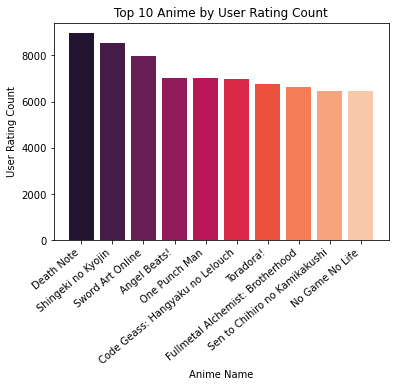

In [325]:
# Data Visualization
import matplotlib.pyplot as plt

# Count the number of occurrences of each anime name
top_10_anime = df_sample['Name'].value_counts().nlargest(10)
palette = sb.color_palette('rocket', len(top_10_anime))
# Create the bar chart
plt.bar(top_10_anime.index, top_10_anime.values, color=palette)

# Set the title and labels
plt.title('Top 10 Anime by User Rating Count')
plt.xlabel('Anime Name')
plt.ylabel('User Rating Count')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=40, ha="right")

# Show the plot
plt.show()

## Filter animes on number of ratings

In [326]:
# Filter out users with less than 150 ratings and animes with less than 3500 ratings
df_sample_anime = df_sample.groupby("anime_id").filter(lambda x: len(x) > 700) # 16872
df_sample_anime

,user_id,anime_id,rating,Name,Genres
25443185,204553,857,7,Air Gear,"Action, Comedy, Ecchi, Shounen, Sports"
39653820,299154,36563,9,Megalo Box,"Action, Sci-Fi, Slice of Life, Sports, Drama"
17791213,236039,29093,10,Grisaia no Meikyuu: Caprice no Mayu 0,Drama
7289864,324764,10620,9,Mirai Nikki,"Action, Mystery, Psychological, Shounen, Super..."
16557182,240998,11761,7,Medaka Box,"Action, Comedy, Ecchi, Martial Arts, School, S..."
...,...,...,...,...,...
29933401,20238,31716,10,Rewrite,"Action, Comedy, Supernatural, Romance, School"
13022027,193934,15583,8,Date A Live,"Sci-Fi, Harem, Comedy, Romance, Mecha, School"
14481434,9703,22729,7,Aldnoah.Zero,"Action, Military, Sci-Fi, Mecha"
14547813,148148,47,10,Akira,"Action, Military, Sci-Fi, Adventure, Horror, S..."


## Filter users on number of ratings

In [329]:
df_sample_users = df_sample_anime.groupby("user_id").filter(lambda x: len(x) > 50) # 310059
df_sample_users

,user_id,anime_id,rating,Name,Genres
32207796,299777,22101,7,Soredemo Sekai wa Utsukushii,"Adventure, Romance, Fantasy, Shoujo"
17851760,332300,3503,7,Kanokon,"Comedy, Ecchi, Harem, Romance, School, Shounen..."
3996366,290134,28891,8,Haikyuu!! Second Season,"Comedy, Sports, Drama, School, Shounen"
35390287,290134,33255,7,Saiki Kusuo no Ψ-nan,"Comedy, School, Shounen, Slice of Life, Supern..."
3541505,192123,35849,8,Darling in the FranXX,"Action, Drama, Mecha, Romance, Sci-Fi"
...,...,...,...,...,...
39828629,330851,3002,8,Gyakkyou Burai Kaiji: Ultimate Survivor,"Game, Psychological, Thriller, Seinen"
35030052,194781,11737,6,Ao no Exorcist Movie,"Action, Demons, Fantasy, Shounen, Supernatural"
1221145,251180,32281,10,Kimi no Na wa.,"Romance, Supernatural, School, Drama"
8923662,192123,2104,7,Seto no Hanayome,"Comedy, Parody, Romance, School, Shounen"


In [330]:
# User ratings
print("USERS \n")
print(len(df_sample_users["user_id"].unique()))
print(df_sample_users["user_id"].value_counts().mean())
print(df_sample_users["user_id"].value_counts().head())
print("\n")

print("ANIMES \n")
# Anime ratings
print(len(df_sample_users["anime_id"].unique()))
print(df_sample_users["anime_id"].value_counts().mean())
print(df_sample_users["anime_id"].value_counts().head())

USERS 

56
55.089285714285715
80962     65
68042     64
308357    64
39785     63
321704    63
Name: user_id, dtype: int64


ANIMES 

1028
3.0009727626459144
14353    10
13333    10
34822     9
29095     8
2001      8
Name: anime_id, dtype: int64


In [331]:
df_sample = df_sample_users

# Join anime_df titles to df_strings
df_strings = df_sample.drop(columns={'anime_id', 'Genres'})
df_strings = df_strings.astype(str)
df_strings = df_strings.astype({'rating': 'float32'})
df_strings

,user_id,rating,Name
32207796,299777,7.0,Soredemo Sekai wa Utsukushii
17851760,332300,7.0,Kanokon
3996366,290134,8.0,Haikyuu!! Second Season
35390287,290134,7.0,Saiki Kusuo no Ψ-nan
3541505,192123,8.0,Darling in the FranXX
...,...,...,...
39828629,330851,8.0,Gyakkyou Burai Kaiji: Ultimate Survivor
35030052,194781,6.0,Ao no Exorcist Movie
1221145,251180,10.0,Kimi no Na wa.
8923662,192123,7.0,Seto no Hanayome


# Evaluation
Divide df into training and test set (80 - 20)

## Model Evaluators

In Recommender Systems, there are a set metrics commonly used for evaluation. We chose to work with Top-N accuracy metrics, which evaluates the accuracy of the top recommendations provided to a user, comparing to the items the user has actually interacted in test set.
This evaluation method works as follows:

* For each user
    * For each item the user has interacted in test set
        * Sample 100 other items the user has never interacted.
        * Ask the recommender model to produce a ranked list of recommended items, from a set composed one interacted item and the 100 non-interacted ("non-relevant!) items
        * Compute the Top-N accuracy metrics for this user and interacted item from the recommendations ranked list
* Aggregate the global Top-N accuracy metrics

In [332]:
train_df, test_df = train_test_split(df_sample,
                                   test_size=0.20,
                                   random_state=42)

print('# ratings on Train set: %d' % len(train_df))
print('# ratings on Test set: %d' % len(test_df))

train_df_str , test_df_str = train_df.drop(columns={"anime_id","Genres"}), test_df.drop(columns={"anime_id","Genres"})

train_df, test_df = train_df.drop(columns={"Name","Genres"}), test_df.drop(columns={"Name","Genres"})

train_df.columns, train_df_str.columns

# ratings on Train set: 2468
# ratings on Test set: 617


(Index(['user_id', 'anime_id', 'rating'], dtype='object'),
 Index(['user_id', 'rating', 'Name'], dtype='object'))

### For anime_id (int)

In [333]:
#Indexing by personId to speed up the searches during evaluation
indexed_df = df_sample.set_index('user_id')
train_indexed_df = train_df.set_index('user_id')
test_indexed_df = test_df.set_index('user_id')

In [334]:
def get_items_interacted(person_id, interactions_df):
    # Get the user's data and merge in the movie information.

    if person_id in interactions_df.index :
        interacted_items = interactions_df.loc[person_id]['anime_id']
    else:
        return []
    
    # print(interacted_items.head(1))
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [335]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:


    def get_not_interacted_items_sample(self, person_id, sample_size, seed=42):
        interacted_items = get_items_interacted(person_id, indexed_df)
        all_items = set(test_indexed_df['anime_id'])
        non_interacted_items = all_items - interacted_items
        
        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index

    def evaluate_model_for_user(self, model, person_id):
        #Getting the items in test set
        interacted_values_testset = test_indexed_df.loc[person_id]
        if type(interacted_values_testset['anime_id']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['anime_id'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['anime_id'])])  
        interacted_items_count_testset = len(person_interacted_items_testset) 

        #Getting a ranked recommendation list from a model for a given user
        person_recs_df = model.recommend_items(person_id, 
                                               items_to_ignore=get_items_interacted(person_id, 
                                                                                    train_indexed_df), 
                                               topn=10000000000)
        
        hits_at_5_count = 0
        hits_at_10_count = 0

        #For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:
            #Getting a random sample (100) items the user has not interacted 
            #(to represent items that are assumed to be no relevant to the user)
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, 
                                                                          sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, 
                                                                          seed=item_id%(2**32))
            #Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            #Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['anime_id'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['anime_id'].values

            #Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        #Recall is the rate of the interacted items that are ranked among the Top-N recommended items, 
        #when mixed with a set of non-relevant items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)
        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}

        return person_metrics

    def evaluate_model(self, model):
        people_metrics = []
        for idx, person_id in enumerate(list(test_indexed_df.index.unique().values)):
            if idx % 100 == 0 and idx > 0:
               print('%d users processed' % idx)
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['user_id'] = person_id
            people_metrics.append(person_metrics)

        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics) \
                            .sort_values('interacted_count', ascending=False)
            
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()    

### For anime Title (string)

In [336]:
#Indexing by personId to speed up the searches during evaluation
indexed_df_str = df_strings.set_index('user_id')
train_indexed_df_str = train_df_str.set_index('user_id')
test_indexed_df_str = test_df_str.set_index('user_id')

In [337]:
def get_items_interacted_str(person_id, interactions_df):
    # Get the user's data and merge in the movie information.
    if person_id in interactions_df.index :
        interacted_items = interactions_df.loc[person_id]['Name']
    else:
        return []
    
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [338]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator_str:


    def get_not_interacted_items_sample(self, person_id, sample_size, seed=42):
        interacted_items = get_items_interacted_str(person_id, indexed_df_str)
        all_items = set(indexed_df_str['Name'])
        non_interacted_items = all_items - set(interacted_items)
        
        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index

    def evaluate_model_for_user(self, model, person_id):
        #Getting the items in test set
        interacted_values_testset = test_indexed_df_str.loc[person_id]
        if type(interacted_values_testset['Name']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['Name'])
        else:
            person_interacted_items_testset = set([interacted_values_testset['Name']])  
        
        interacted_items_count_testset = len(person_interacted_items_testset) 
        #Getting a ranked recommendation list from a model for a given user
        person_recs_df = model.recommend_items(person_id, 
                                               items_to_ignore=get_items_interacted_str(person_id, 
                                                                                    train_indexed_df_str), 
                                               topn=10000000000)
        hits_at_5_count = 0
        hits_at_10_count = 0

        #For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:
            #Getting a random sample (100) items the user has not interacted 
            #(to represent items that are assumed to be no relevant to the user)
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id,
                                                                          sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS 
                                                                          )

            #Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            #Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['Name'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['Name'].values
            #Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        #Recall is the rate of the interacted items that are ranked among the Top-N recommended items, 
        #when mixed with a set of non-relevant items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)
        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}

        return person_metrics

    def evaluate_model(self, model):
        people_metrics = []
        for idx, person_id in enumerate(list(test_indexed_df_str.index.unique().values)):
            if idx % 100 == 0 and idx > 0:
               print('%d users processed' % idx)
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['user_id'] = person_id
            people_metrics.append(person_metrics)

        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics) \
                            .sort_values('interacted_count', ascending=False)
            
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}    
        return global_metrics, detailed_results_df
    
model_evaluator_str = ModelEvaluator_str()    

## Popularity model

In [339]:
#Computes the most popular items
item_popularity_df = indexed_df.groupby('anime_id')['rating'].sum().sort_values(ascending=False).reset_index()
item_popularity_df.head(10)

,anime_id,rating
0,14353,76
1,34822,72
2,2001,71
3,30276,68
4,13333,67
5,29095,65
6,934,61
7,9260,59
8,13659,58
9,32937,57


In [340]:
class PopularityRecommender:
    
    MODEL_NAME = 'Popularity'
    
    def __init__(self, popularity_df, items_df=None):
        self.popularity_df = popularity_df
        self.items_df = items_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        # Recommend the more popular items that the user hasn't seen yet.
        recommendations_df = self.popularity_df[~self.popularity_df['anime_id'].isin(items_to_ignore)] \
                               .sort_values('rating', ascending = False) \
                               .head(topn)

        if verbose:
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')
    
            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'anime_id', 
                                                          right_on = 'anime_id')[['rating']]


        return recommendations_df
    
prediction_matrix_popularity = item_popularity_df
popularity_model = PopularityRecommender(item_popularity_df, indexed_df)

In [341]:
# RUN POPULARITY MODEL

import warnings
warnings.filterwarnings('ignore')
print('Evaluating Popularity recommendation model... (', len(test_indexed_df.index.unique()), ' users )')
pop_global_metrics, pop_detailed_results_df = model_evaluator.evaluate_model(popularity_model)
print('\nGlobal metrics:\n%s' % pop_global_metrics)
pop_detailed_results_df.head(10)

Evaluating Popularity recommendation model... ( 56  users )
55 users processed

Global metrics:
{'modelName': 'Popularity', 'recall@5': 0.06645056726094004, 'recall@10': 0.12479740680713128}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,user_id
8,0,1,20,0.000000,0.050000,39785
6,2,3,19,0.105263,0.157895,181711
26,0,2,19,0.000000,0.105263,58944
43,1,3,17,0.058824,0.176471,314851
25,2,2,17,0.117647,0.117647,165884
4,1,1,16,0.062500,0.062500,99690
7,6,7,16,0.375000,0.437500,191503
34,1,1,16,0.062500,0.062500,299777
46,2,2,15,0.133333,0.133333,12688
1,0,0,14,0.000000,0.000000,290134


## Collaborative Filtering
* Singular Value Decomposition (SVD)
* Pearson correlation

### Singular Value Decmposition Matrix Factorization

In [342]:
# User-item matrix (users as rows, anime as columns)
user_anime_df = train_df.pivot(index='user_id', columns='anime_id', values='rating').fillna(0)
user_anime_df.head()

anime_id,1,5,6,16,19,20,24,27,30,32,...,40010,40060,40221,40496,40591,40776,40956,41168,41353,41389
user_id,,,,,,,,,,,,,,,,,,,,,
4773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
11249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0
12688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0


In [343]:
user_anime_matrix_sparse = csr_matrix(user_anime_df)
user_anime_matrix_sparse

<56x977 sparse matrix of type '<class 'numpy.float64'>'
	with 2468 stored elements in Compressed Sparse Row format>

In [344]:
#The number of factors to factor the user-anime matrix.
NUMBER_OF_FACTORS_MF = 15
#Performs matrix factorization of the original user anime matrix
U, sigma, Vt = svds(user_anime_matrix_sparse, k = NUMBER_OF_FACTORS_MF)
sigma = np.diag(sigma)
user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

print("U shape - ",U.shape, "\nVt shape - ", Vt.shape, "\nsigma shape - ", sigma.shape, "\n")

U shape -  (56, 15) 
Vt shape -  (15, 977) 
sigma shape -  (15, 15) 



In [345]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(user_predicted_ratings, columns = user_anime_df.columns, index=user_anime_df.index).transpose()
print(len(cf_preds_df.columns))
cf_preds_df.head(5)

56


user_id,4773,11249,11697,12688,15083,19064,22018,23930,38287,39020,...,298783,299777,308357,314851,321679,321704,330851,332300,333379,348776
anime_id,,,,,,,,,,,,,,,,,,,,,
1,0.192227,0.798864,0.613543,-0.085330,-0.621720,0.145199,0.056512,0.852280,0.088918,1.260117,...,-0.985705,0.398373,1.583594,-0.187876,3.132256,0.510304,1.959091,0.166407,-0.790548,-0.493679
5,0.356150,3.079707,0.436372,0.422684,0.723072,0.998187,0.456866,-0.394065,0.008378,-0.263715,...,0.477222,0.531839,3.557714,-0.319282,1.154052,0.201112,-0.932194,-0.813855,-1.467403,1.437137
6,1.388610,-0.165836,0.258360,0.824127,-0.165856,0.235894,0.198964,0.739503,-0.242737,-0.515667,...,-0.363700,0.035624,0.210338,0.116476,-0.695875,0.191515,-0.084263,-1.135327,-0.380767,-0.334991
16,0.454307,2.208059,0.285969,0.030563,0.350320,1.003495,0.425994,-0.228896,0.321902,-0.473481,...,0.948277,0.793753,3.760799,-1.167586,1.489646,0.012292,-1.127703,-1.015921,-1.517425,1.674744
19,0.582219,-0.892550,-0.576902,-0.301119,0.172380,-0.342910,0.162986,0.489784,7.806679,-0.471478,...,1.790295,-0.426896,1.650083,1.976277,1.061906,1.962703,0.064356,-0.977353,1.425621,1.151946


In [346]:
class GeneralRecommender:
    
    MODEL_NAME = 'Model Evaluator (anime_id)'
    
    def __init__(self, cf_predictions_df, items_df=None):
        self.cf_predictions_df = cf_predictions_df
        self.items_df = items_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False) \
                                    .reset_index().rename(columns={user_id: 'rating'})

        # Recommend the highest predicted rating movies that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['anime_id'].isin(items_to_ignore)] \
                                .sample(frac=1) \
                                .sort_values('rating', ascending = False) \
                                .head(topn)
        # print(recommendations_df.head(3))
        if verbose:
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')

            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'anime_id', 
                                                          right_on = 'anime_id')[['rating', 'anime_id']]

        return recommendations_df

prediction_matrix_svd = cf_preds_df
svd_recommender_model = GeneralRecommender(cf_preds_df, indexed_df)

In [347]:
import warnings
warnings.filterwarnings('ignore')
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
svd_global_metrics, svd_detailed_results_df = model_evaluator.evaluate_model(svd_recommender_model)
print('\nGlobal metrics:\n%s' % svd_global_metrics)
svd_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
55 users processed

Global metrics:
{'modelName': 'Model Evaluator (anime_id)', 'recall@5': 0.050243111831442464, 'recall@10': 0.07941653160453808}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,user_id
8,1,1,20,0.050000,0.050000,39785
6,1,1,19,0.052632,0.052632,181711
26,1,2,19,0.052632,0.105263,58944
43,0,1,17,0.000000,0.058824,314851
25,1,1,17,0.058824,0.058824,165884
4,0,1,16,0.000000,0.062500,99690
7,1,2,16,0.062500,0.125000,191503
34,1,1,16,0.062500,0.062500,299777
46,1,2,15,0.066667,0.133333,12688
1,2,2,14,0.142857,0.142857,290134


### User-based collaborative filtering
* Pearson correlation between users

In [348]:
# Making anime-user matrix with predicted user ratings
user_anime_df
# Average ratings by anime
user_item_matrix = user_anime_df.subtract(user_anime_df.mean(axis=1), axis='rows')

# Compute the Pearson correlation between users
user_corr = user_item_matrix.T.corr()

user_item_matrix.head(3), user_corr.head(3)

(anime_id     1         5         6         16        19        20     \
 user_id                                                                
 4773     -0.299898 -0.299898 -0.299898 -0.299898 -0.299898 -0.299898   
 11249    -0.373593 -0.373593 -0.373593 -0.373593 -0.373593 -0.373593   
 11697    -0.309110 -0.309110 -0.309110 -0.309110 -0.309110 -0.309110   
 
 anime_id     24        27        30        32     ...     40010     40060  \
 user_id                                           ...                       
 4773     -0.299898 -0.299898 -0.299898 -0.299898  ... -0.299898 -0.299898   
 11249    -0.373593 -0.373593 -0.373593 -0.373593  ... -0.373593 -0.373593   
 11697    -0.309110 -0.309110 -0.309110 -0.309110  ... -0.309110 -0.309110   
 
 anime_id     40221     40496     40591     40776     40956     41168  \
 user_id                                                                
 4773      6.700102 -0.299898 -0.299898 -0.299898 -0.299898 -0.299898   
 11249    -0.373593 -0

In [349]:
# Fill with -1 so unpredicted movies arent altered

user_pred_ratings = user_item_matrix.copy()
for col in user_pred_ratings.columns:
    user_pred_ratings[col].values[:] = -1
# user_pred_ratings

anime_id,1,5,6,16,19,20,24,27,30,32,...,40010,40060,40221,40496,40591,40776,40956,41168,41353,41389
user_id,,,,,,,,,,,,,,,,,,,,,
4773,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
11249,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
11697,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
12688,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
15083,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
19064,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
22018,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
23930,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
38287,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [350]:
from IPython.display import clear_output, display
# make prediction dataframe 
user_corr.index.tolist()[:5]
progress = 0

# for each user
for user_id in user_corr.index.tolist():
    # top 10 similar users
    similar_users = user_corr[user_id].sort_values(ascending=False)[1:10+1].index.tolist()
    # for each anime user didn't watch
    for anime_id in user_anime_df.transpose()[user_anime_df.transpose()[user_id] == 0].index.tolist():
        total = 0
        count = 0
        # If user didn't rate that anime we don't want him to predict the rating based on his value
        for user in similar_users:
            if( user_anime_df[anime_id][user] != 0):
                total += user_item_matrix[anime_id][user] * user_corr[user][user_id]
                count +=1
        if(count != 0):
            user_pred_ratings[anime_id][user_id] = total/count
    progress += 1
    clear_output(wait=True)
    print(progress, "/", len(user_corr.index.tolist()))

            

user_pred_ratings
prediction_matrix_pearson = user_pred_ratings

56 / 56


In [351]:
# Using pearson correlation to have similarity between users, and than using that similarity as weight
# predict user rating on anime based on similar users rating

import warnings
warnings.filterwarnings('ignore')
pearson_recommender_model = GeneralRecommender(user_pred_ratings.transpose(), indexed_df)
print('Evaluating Collaborative Filtering User Pearson correlation model...')
pearson_global_metrics, pearson_detailed_results_df = model_evaluator.evaluate_model(pearson_recommender_model)
print('\nGlobal metrics:\n%s' % pearson_global_metrics)
pearson_detailed_results_df.head(10)

Evaluating Collaborative Filtering User Pearson correlation model...
55 users processed

Global metrics:
{'modelName': 'Model Evaluator (anime_id)', 'recall@5': 0.03727714748784441, 'recall@10': 0.07617504051863858}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,user_id
8,1,1,20,0.050000,0.050000,39785
6,0,1,19,0.000000,0.052632,181711
26,1,1,19,0.052632,0.052632,58944
43,0,0,17,0.000000,0.000000,314851
25,0,2,17,0.000000,0.117647,165884
4,1,2,16,0.062500,0.125000,99690
7,0,1,16,0.000000,0.062500,191503
34,0,0,16,0.000000,0.000000,299777
46,1,3,15,0.066667,0.200000,12688
1,1,1,14,0.071429,0.071429,290134


## Deep Learning

### Neural Network with anime_id (int)

In [352]:
animes_ds = tf.data.Dataset.from_tensor_slices(df_sample["anime_id"].values)
dataset = tf.data.Dataset.from_tensor_slices(df_sample[['user_id','anime_id',"rating"]].values.astype('int32'))
dataset = dataset.map(lambda x: {"user_id": x[0],"anime_id": x[1],"rating": x[2]})

In [353]:
tf.random.set_seed(42)


shuffled = dataset.shuffle(100_000, seed=42, reshuffle_each_iteration=False)
train = shuffled.take(80_000)
test = shuffled.skip(80_000).take(20_000)

cached_train = train.shuffle(100_000).batch(2048)
cached_test = test.batch(4096).cache()

In [354]:
class RankingModel(tf.keras.Model):

  def __init__(self):
    super().__init__()
    embedding_dimension = 32

    # Compute embeddings for users.
    self.user_embeddings = tf.keras.Sequential([
        tf.keras.layers.IntegerLookup(vocabulary=df['user_id'].unique().astype('int32')),
        tf.keras.layers.Embedding(len(df["user_id"].unique()) + 1, 32),
    ])

    # Compute embeddings for animes.
    self.anime_embeddings = tf.keras.Sequential([
      tf.keras.layers.IntegerLookup(vocabulary=df['anime_id'].unique().astype('int32')),
      tf.keras.layers.Embedding(len(df["anime_id"].unique()) + 1, 32)
    ])

    # Compute predictions.
    self.ratings = tf.keras.Sequential([
      # Learn multiple dense layers.
      tf.keras.layers.Dense(256, activation="relu"),
      tf.keras.layers.Dense(64, activation="relu"),
      # Make rating predictions in the final layer.
      tf.keras.layers.Dense(1)
  ])

  def call(self, inputs):

    user_id, anime_title = inputs

    user_embedding = self.user_embeddings(user_id)
    anime_embedding = self.anime_embeddings(anime_title)

    return self.ratings(tf.concat([user_embedding, anime_embedding], axis=1))

In [355]:
from typing import Dict, Text

task = tfrs.tasks.Ranking(
  loss = tf.keras.losses.MeanSquaredError(),
  metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

class AnimeModel(tfrs.models.Model):

  def __init__(self):
    super().__init__()
    self.ranking_model: tf.keras.Model = RankingModel()
    self.task: tf.keras.layers.Layer = tfrs.tasks.Ranking(
      loss = tf.keras.losses.MeanSquaredError(),
      metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )

  def call(self, features: Dict[str, tf.Tensor]) -> tf.Tensor:
    return self.ranking_model(
        (features["user_id"], features["anime_id"]))

  def compute_loss(self, features: Dict[Text, tf.Tensor], training=False) -> tf.Tensor:
    labels = features.pop("rating")

    rating_predictions = self(features)

    # The task computes the loss and the metrics.
    return self.task(labels=labels, predictions=rating_predictions)

In [356]:
model_nn = AnimeModel()
model_nn.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.001))

In [357]:
model_nn.fit(cached_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 9ms/step - root_mean_squared_error: 7.4413 - loss: 55.0844 - regularization_loss: 0.0000e+00 - total_loss: 55.0844
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - root_mean_squared_error: 7.4274 - loss: 55.4925 - regularization_loss: 0.0000e+00 - total_loss: 55.4925
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - root_mean_squared_error: 7.4168 - loss: 54.7625 - regularization_loss: 0.0000e+00 - total_loss: 54.7625
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - root_mean_squared_error: 7.4073 - loss: 55.1479 - regularization_loss: 0.0000e+00 - total_loss: 55.1479
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - root_mean_squared_error: 7.3984 - loss: 54.7813 - regularization_loss: 0.0000e+00 - total_loss: 54.7813
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - root_mean_squared_error: 7.3898 - loss: 55.0708 - regularization_loss: 0.0000e+00 - total_

In [358]:
# cached_train

In [359]:
# model_nn.evaluate(cached_test, return_dict=True)

In [360]:
# Fill with -1 so unpredicted movies arent altered

predictions_matrix = test_df.pivot(index='user_id', columns='anime_id', values='rating').fillna(0)
for col in predictions_matrix.columns:
    predictions_matrix[col].values[:] = -1
predictions_matrix

anime_id,5,16,20,24,27,30,31,33,44,59,...,39026,39597,39710,40004,40454,40496,40540,40591,41353,41389
user_id,,,,,,,,,,,,,,,,,,,,,
4773,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
11249,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
11697,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
12688,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
15083,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
19064,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
22018,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
23930,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
38287,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [361]:
import warnings
warnings.filterwarnings('ignore')

users_to_predict = test_df["user_id"].unique()
print("Prediciting for {} users".format(len(users_to_predict)))

test_ratings = {}

i = 0
for user in users_to_predict:
    movies_to_predict = test_df["anime_id"].unique()
    print("Predicting for user {} {} movies ({})".format(user, len(movies_to_predict), i )) 
    i+=1
    for anime_id in movies_to_predict:
        predictions_matrix[anime_id][user] = float(model_nn({
            "user_id": np.array([user]),
            "anime_id": np.array([anime_id])
        }))

predictions_matrix_nn_id = predictions_matrix

Prediciting for 56 users
Predicting for user 212891 479 movies (0)
Predicting for user 290134 479 movies (1)
Predicting for user 110900 479 movies (2)
Predicting for user 277841 479 movies (3)
Predicting for user 99690 479 movies (4)
Predicting for user 44342 479 movies (5)
Predicting for user 181711 479 movies (6)
Predicting for user 191503 479 movies (7)
Predicting for user 39785 479 movies (8)
Predicting for user 216807 479 movies (9)
Predicting for user 41241 479 movies (10)
Predicting for user 332300 479 movies (11)
Predicting for user 11697 479 movies (12)
Predicting for user 252084 479 movies (13)
Predicting for user 38287 479 movies (14)
Predicting for user 19064 479 movies (15)
Predicting for user 23930 479 movies (16)
Predicting for user 132753 479 movies (17)
Predicting for user 238951 479 movies (18)
Predicting for user 321679 479 movies (19)
Predicting for user 194781 479 movies (20)
Predicting for user 192123 479 movies (21)
Predicting for user 262108 479 movies (22)
Pred

In [362]:
predictions_matrix

anime_id,5,16,20,24,27,30,31,33,44,59,...,39026,39597,39710,40004,40454,40496,40540,40591,41353,41389
user_id,,,,,,,,,,,,,,,,,,,,,
4773,7.301950,7.233564,7.327849,7.258110,7.246576,7.040894,6.832615,7.031908,7.190131,7.069342,...,6.810646,6.959600,7.196342,7.073389,6.940785,6.894292,6.593837,6.897944,7.075033,7.050989
11249,7.811312,7.742581,7.838387,7.766706,7.753839,7.552199,7.342623,7.542872,7.698744,7.579115,...,7.317863,7.467660,7.706471,7.585223,7.451322,7.401552,7.104137,7.409150,7.585755,7.560632
11697,7.461231,7.392863,7.488890,7.418439,7.408695,7.201768,6.996236,7.195747,7.353983,7.228929,...,6.972870,7.120932,7.356719,7.233925,7.104178,7.050746,6.756197,7.058311,7.236336,7.212501
12688,6.519389,6.454365,6.548430,6.474365,6.465697,6.258242,6.054879,6.254495,6.412298,6.287518,...,6.031534,6.183795,6.417667,6.295149,6.161346,6.103996,5.817007,6.119075,6.295133,6.270421
15083,7.218574,7.150017,7.243367,7.171966,7.160806,6.957130,6.747775,6.947418,7.107384,6.984612,...,6.727277,6.872501,7.112828,6.990738,6.858386,6.806669,6.507350,6.814229,6.988038,6.967986
19064,6.089579,6.021757,6.114866,6.044206,6.036313,5.832001,5.621292,5.823376,5.981143,5.856442,...,5.599228,5.750010,5.986747,5.866834,5.731768,5.676828,5.379891,5.687974,5.862760,5.839574
22018,5.130876,5.063544,5.156792,5.089262,5.076935,4.871327,4.663569,4.862475,5.019244,4.897431,...,4.642999,4.792569,5.024887,4.905946,4.771878,4.722736,4.426416,4.726968,4.904768,4.879575
23930,7.962538,7.892521,7.988498,7.916635,7.908042,7.702052,7.494723,7.691898,7.851567,7.726747,...,7.469369,7.618878,7.857955,7.734817,7.601072,7.552770,7.257128,7.559709,7.734040,7.710149
38287,8.374322,8.305796,8.402889,8.328216,8.320016,8.115191,7.908491,8.107154,8.267656,8.142900,...,7.887873,8.033996,8.269923,8.149574,8.017450,7.965396,7.670721,7.972484,8.149565,8.128342


In [363]:
import warnings
warnings.filterwarnings('ignore')
# only select from predictions_matrix and indexed_df users in users_to_predict
nn_recommender_model = GeneralRecommender(predictions_matrix.transpose(), indexed_df)
print('Evaluating Neural Network anime_id model...')
nn_global_metrics, nn_detailed_results_df = model_evaluator.evaluate_model(nn_recommender_model)
print('\nGlobal metrics:\n%s' % nn_global_metrics)
nn_detailed_results_df.head(10)

Evaluating Neural Network anime_id model...
55 users processed

Global metrics:
{'modelName': 'Model Evaluator (anime_id)', 'recall@5': 0.06645056726094004, 'recall@10': 0.1312803889789303}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,user_id
8,0,1,20,0.000000,0.050000,39785
6,4,4,19,0.210526,0.210526,181711
26,0,2,19,0.000000,0.105263,58944
43,1,1,17,0.058824,0.058824,314851
25,3,4,17,0.176471,0.235294,165884
4,2,3,16,0.125000,0.187500,99690
7,2,3,16,0.125000,0.187500,191503
34,0,1,16,0.000000,0.062500,299777
46,0,0,15,0.000000,0.000000,12688
1,2,2,14,0.142857,0.142857,290134


### Neural Network with anime Name (string)

In [364]:
class Recommender_AnimeName:
    
    MODEL_NAME = 'Neural Network (anime Name)'
    
    def __init__(self, cf_predictions_df, items_df=None):
        self.cf_predictions_df = cf_predictions_df
        self.items_df = items_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        # Get and sort the user's predictions
        
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False) \
                                    .reset_index().rename(columns={user_id: 'rating'})
        # Recommend the highest predicted rating movies that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['Name'].isin(items_to_ignore)] \
                               .sort_values('rating', ascending = False) \
                               .head(topn)

        if verbose:
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')

            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'Name', 
                                                          right_on = 'Name')[['rating', 'Name']]


        return recommendations_df
    
# nn_recommender_model = NNRecommender(cf_preds_df, indexed_df_str)

In [365]:
user_animeName_matrix = test_df_str.pivot(index='user_id', columns='Name', values='rating').fillna(0)
user_animeName_matrix.head()

Name,07-Ghost,3-gatsu no Lion,Accel World,Acchi Kocchi (TV),Afro Samurai,Akagami no Shirayuki-hime,Akame ga Kill!,Akaneiro ni Somaru Saka,Akikan!,Aldnoah.Zero,...,Yu☆Gi☆Oh!: Duel Monsters GX,Zankyou no Terror,Zero no Tsukaima,Zero no Tsukaima: Futatsuki no Kishi,Zero no Tsukaima: Princesses no Rondo - Yuuwaku no Sunahama,Zoku Sayonara Zetsubou Sensei,Zombieland Saga,ef: A Tale of Melodies.,ef: A Tale of Memories.,xxxHOLiC Kei
user_id,,,,,,,,,,,,,,,,,,,,,
4773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11697,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0
12688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [366]:
dataset = tf.data.Dataset.from_tensor_slices(dict(df_strings))

tf.random.set_seed(42)


shuffled = dataset.shuffle(100_000, seed=42, reshuffle_each_iteration=False)
train = shuffled.take(80_000)
test = shuffled.skip(80_000).take(20_000)

cached_train = train.shuffle(100_000).batch(2048)
cached_test = test.batch(4096).cache()

In [367]:
class RankingModel_2(tf.keras.Model):

  def __init__(self):
    super().__init__()
    embedding_dimension = 32

    # Compute embeddings for users.
    self.user_embeddings = tf.keras.Sequential([
        tf.keras.layers.StringLookup(vocabulary=df_strings['user_id'].unique()),
        tf.keras.layers.Embedding(len(df_strings["user_id"].unique()) + 1, 32),
    ])

    # Compute embeddings for animes.
    self.anime_embeddings = tf.keras.Sequential([
      tf.keras.layers.StringLookup(vocabulary=df_strings['Name'].unique()),
      tf.keras.layers.Embedding(len(df_strings["Name"].unique()) + 1, 32)
    ])

    # Compute predictions.
    self.ratings = tf.keras.Sequential([
      # Learn multiple dense layers.
      tf.keras.layers.Dense(256, activation="relu"),
      tf.keras.layers.Dense(64, activation="relu"),
      # Make rating predictions in the final layer.
      tf.keras.layers.Dense(1)
  ])

  def call(self, inputs):

    user_id, anime_title = inputs

    user_embedding = self.user_embeddings(user_id)
    anime_embedding = self.anime_embeddings(anime_title)

    return self.ratings(tf.concat([user_embedding, anime_embedding], axis=1))

In [368]:
from typing import Dict, Text

class AnimeModel_2(tfrs.models.Model):

  def __init__(self):
    super().__init__()
    self.ranking_model: tf.keras.Model = RankingModel_2()
    self.task: tf.keras.layers.Layer = tfrs.tasks.Ranking(
      loss = tf.keras.losses.MeanSquaredError(),
      metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )

  def call(self, features: Dict[str, tf.Tensor]) -> tf.Tensor:
    return self.ranking_model(
        (features["user_id"], features["Name"]))

  def compute_loss(self, features: Dict[Text, tf.Tensor], training=False) -> tf.Tensor:
    labels = features.pop("rating")

    rating_predictions = self(features)

    # The task computes the loss and the metrics.
    return self.task(labels=labels, predictions=rating_predictions)

In [369]:
model_nn_2 = AnimeModel_2()
model_nn_2.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.01))

model_nn_2.fit(cached_train, epochs=250)

Epoch 1/250
2/2 [==============================] - 0s 11ms/step - root_mean_squared_error: 7.4160 - loss: 54.3469 - regularization_loss: 0.0000e+00 - total_loss: 54.3469
Epoch 2/250
2/2 [==============================] - 0s 6ms/step - root_mean_squared_error: 7.2315 - loss: 52.1453 - regularization_loss: 0.0000e+00 - total_loss: 52.1453
Epoch 3/250
2/2 [==============================] - 0s 6ms/step - root_mean_squared_error: 7.0003 - loss: 48.1756 - regularization_loss: 0.0000e+00 - total_loss: 48.1756
Epoch 4/250
2/2 [==============================] - 0s 6ms/step - root_mean_squared_error: 6.6904 - loss: 44.2107 - regularization_loss: 0.0000e+00 - total_loss: 44.2107
Epoch 5/250
2/2 [==============================] - 0s 8ms/step - root_mean_squared_error: 6.2697 - loss: 38.3585 - regularization_loss: 0.0000e+00 - total_loss: 38.3585
Epoch 6/250
2/2 [==============================] - 0s 6ms/step - root_mean_squared_error: 5.7256 - loss: 32.0110 - regularization_loss: 0.0000e+00 - total

In [370]:
# model_nn_2.evaluate(cached_test, return_dict=True)
# model_nn_2({
#             "user_id": [101027],
#             "Name": "11eyes"
#         })

In [371]:
# Fill with -1 so unpredicted movies arent used

predictions_matrix = user_animeName_matrix.copy()
for col in predictions_matrix.columns:
    predictions_matrix[col].values[:] = -1
# predictions_matrix

In [372]:
import warnings
warnings.filterwarnings('ignore')

users_to_predict = test_df_str["user_id"].unique()
print("Prediciting for {} users".format(len(users_to_predict)))

test_ratings = {}

i = 0
for user in users_to_predict:
    # Movies user didn't watch because they will be ignored in the prediction
    movies_to_predict = test_df_str["Name"].unique()
    print("Predicting for user {} {} movies ({})".format(user, len(movies_to_predict), i )) 
    i+=1
    for anime_title in movies_to_predict:
        predictions_matrix[anime_title][user] = float(model_nn_2({
            "user_id": np.array([str(user)]),
            "Name": np.array([anime_title])
        }))

predictions_matrix_nn_name = predictions_matrix


Prediciting for 56 users
Predicting for user 212891 479 movies (0)
Predicting for user 290134 479 movies (1)
Predicting for user 110900 479 movies (2)
Predicting for user 277841 479 movies (3)
Predicting for user 99690 479 movies (4)
Predicting for user 44342 479 movies (5)
Predicting for user 181711 479 movies (6)
Predicting for user 191503 479 movies (7)
Predicting for user 39785 479 movies (8)
Predicting for user 216807 479 movies (9)
Predicting for user 41241 479 movies (10)
Predicting for user 332300 479 movies (11)
Predicting for user 11697 479 movies (12)
Predicting for user 252084 479 movies (13)
Predicting for user 38287 479 movies (14)
Predicting for user 19064 479 movies (15)
Predicting for user 23930 479 movies (16)
Predicting for user 132753 479 movies (17)
Predicting for user 238951 479 movies (18)
Predicting for user 321679 479 movies (19)
Predicting for user 194781 479 movies (20)
Predicting for user 192123 479 movies (21)
Predicting for user 262108 479 movies (22)
Pred

In [373]:
# predictions_matrix

In [374]:
import warnings
warnings.filterwarnings('ignore')
nn_str_recommender_model = Recommender_AnimeName(predictions_matrix.transpose(), indexed_df_str)
print('Evaluating Neural Network model...')
nn_str_global_metrics, nn_str_detailed_results_df = model_evaluator_str.evaluate_model(nn_str_recommender_model)
print('\nGlobal metrics:\n%s' % nn_str_global_metrics)
nn_str_detailed_results_df.head(10)

Evaluating Neural Network model...
55 users processed

Global metrics:
{'modelName': 'Neural Network (anime Name)', 'recall@5': 0.1280388978930308, 'recall@10': 0.353322528363047}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,user_id
8,0,6,20,0.000000,0.300000,39785
6,2,6,19,0.105263,0.315789,181711
26,2,7,19,0.105263,0.368421,58944
43,3,5,17,0.176471,0.294118,314851
25,2,6,17,0.117647,0.352941,165884
4,5,7,16,0.312500,0.437500,99690
7,6,11,16,0.375000,0.687500,191503
34,1,6,16,0.062500,0.375000,299777
46,3,6,15,0.200000,0.400000,12688
1,3,8,14,0.214286,0.571429,290134


## Final Analyzis

In [375]:
# Popularity
pop_detailed_results_df.head(3),

# SVD
svd_detailed_results_df.head(3),

# Pearson
pearson_detailed_results_df.head(3),

# NN (int)
nn_detailed_results_df.head(3),

# NN (str)
nn_str_detailed_results_df.head(3),

(    hits@5_count  hits@10_count  interacted_count  recall@5  recall@10  \
 8              0              6                20  0.000000   0.300000   
 6              2              6                19  0.105263   0.315789   
 26             2              7                19  0.105263   0.368421   
 
     user_id  
 8     39785  
 6    181711  
 26    58944  ,)

In [376]:
df_id_name = pd.DataFrame.merge(test_df, df_sample[["anime_id","Name"]], on="anime_id")
# user_id_selected = 99690

In [382]:
def show_values_comparison_id(user_id_selected, predictions_matrix) :
    print(f"Animes {user_id_selected} saw : \n", test_df[test_df["user_id"] == 99337]["anime_id"].values)
    print("---predicted vs orignal---")
    for anime_id_sel in test_df[test_df["user_id"] == user_id_selected]["anime_id"].values:
        original = int(test_df[test_df["user_id"] == user_id_selected].loc[test_df[test_df["user_id"] == user_id_selected][ "anime_id"] == anime_id_sel]["rating"])
        prediction = predictions_matrix.loc[predictions_matrix.index == user_id_selected][anime_id_sel].values[0]
        #                                                                                 df_id_name.loc[df_id_name["anime_id"] == anime_id_sel]["Name"].unique()[0]      
        prediction = format(prediction, ".1f")
        print(f"Anime {anime_id_sel} has rating : {prediction} --- {original}")

show_values_comparison_id(99690, predictions_matrix_nn_id)

Animes 99690 saw : 
 []
---predicted vs orignal---
Anime 5204 has rating : 4.7 --- 3
Anime 37347 has rating : 4.5 --- 3
Anime 26243 has rating : 4.5 --- 4
Anime 37675 has rating : 4.6 --- 4
Anime 4472 has rating : 4.8 --- 4
Anime 263 has rating : 4.9 --- 7
Anime 5081 has rating : 5.1 --- 5
Anime 16706 has rating : 5.1 --- 6
Anime 21557 has rating : 4.7 --- 7
Anime 9367 has rating : 4.8 --- 4
Anime 5356 has rating : 4.7 --- 5
Anime 227 has rating : 4.7 --- 6
Anime 4081 has rating : 4.5 --- 6
Anime 36296 has rating : 4.8 --- 7
Anime 24833 has rating : 4.6 --- 5
Anime 237 has rating : 5.3 --- 6


In [381]:
def show_values_comparison_name(user_id_selected, predictions_matrix) :
    print(f"Animes {user_id_selected} saw : \n", test_df[test_df["user_id"] == 99337]["anime_id"].values)
    print("---predicted vs orignal---")
    for anime_id_sel in test_df[test_df["user_id"] == user_id_selected]["anime_id"].values:
        original = int(test_df[test_df["user_id"] == user_id_selected].loc[test_df[test_df["user_id"] == user_id_selected][ "anime_id"] == anime_id_sel]["rating"])
        prediction = predictions_matrix.loc[predictions_matrix.index == user_id_selected][df_id_name.loc[df_id_name["anime_id"] == anime_id_sel]["Name"].unique()[0]].values[0]
        prediction = format(prediction, ".1f")
        print(f"Anime {anime_id_sel} has rating : {prediction} --- {original}")

show_values_comparison_name(99690, predictions_matrix_nn_name)

Animes 99690 saw : 
 []
---predicted vs orignal---
Anime 5204 has rating : 3.9 --- 3
Anime 37347 has rating : 3.6 --- 3
Anime 26243 has rating : 3.9 --- 4
Anime 37675 has rating : 4.4 --- 4
Anime 4472 has rating : 4.5 --- 4
Anime 263 has rating : 6.4 --- 7
Anime 5081 has rating : 6.1 --- 5
Anime 16706 has rating : 5.5 --- 6
Anime 21557 has rating : 6.0 --- 7
Anime 9367 has rating : 3.7 --- 4
Anime 5356 has rating : 4.3 --- 5
Anime 227 has rating : 4.4 --- 6
Anime 4081 has rating : 5.3 --- 6
Anime 36296 has rating : 5.8 --- 7
Anime 24833 has rating : 4.5 --- 5
Anime 237 has rating : 5.3 --- 6
